![](http://)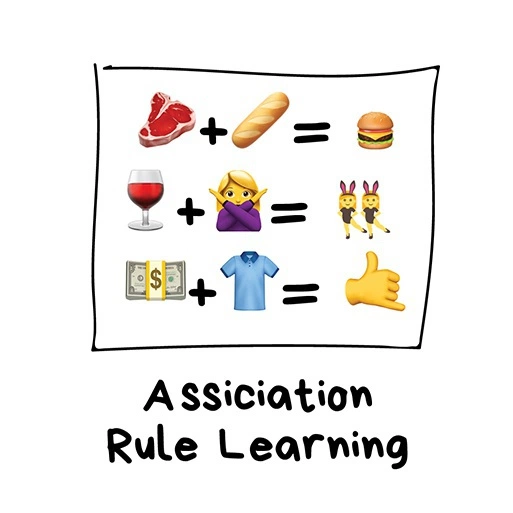

# Association Rules: Apriori Algorithm

	****Introduction 
*     Association Rules was developed by Agrawal in 1993. It explores the hidden relationships between units by taking into account the simultaneous and frequent realization criteria of the units in the database. That is to say, its aim is to identify relations between products or variables in a dataset. The main idea is to find out which products often go together or with what frequency, etc. Association Rules are often preferred in terms of applicability in almost every field such as promotion analysis, market basket analysis, cross-marketing, layout designs, and catalog. Especially, it is often utilized in market basket analysis.
*     In association rules, the most important event is rule extraction. In the association rules model, there is no initial research problem as in other data mining models. With the help of Minimum Support Value and Minimum Confidence Value, researcher generated the rules from the data, and as a result, valid and reliable rules are tried to be reached. Some association rules algorithms are used for fast and reliable pattern recognition. Apriori algorithm is generally preferred in association rules studies. Agrawal and Srikant developed apriori algorithm, is a level-wise, breadth-first algorithm. In this study, I describe an implementation of the well-known apriori algorithm for the induction of association rules.

# Import Some Necessary Libraries

In [ ]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

# Load Data

In [ ]:
df = pd.read_csv('../input/supermarket/GroceryStoreDataSet.csv', names = ['Products'], sep = ',')

In [ ]:
df.head()

In [ ]:
df.shape

In [ ]:
df.info()

In [ ]:
df.values

In [ ]:
data = list(df["Products"].apply(lambda x:x.split(',')))

In [ ]:
data

* ****One-Hot Encoding****

* As seen below, the algorithm should be transformed as True/False or 1/0. That is, the list is converted to a list of one-hot encoded boolean.

In [ ]:
myEncoding = TransactionEncoder()
myEncoding_data = myEncoding.fit(data).transform(data)
df = pd.DataFrame(myEncoding_data,columns=myEncoding.columns_)
df.head()

In [ ]:
df.sum()

* In order to conduct the Apriori Model, a minimum support parameters is used. A min_support value with a threshold value of 20% is applied. 

In [ ]:
df = apriori(df,min_support=0.2,use_colnames=True,verbose=1)

In [ ]:
df

In [ ]:
# Sorting
df.sort_values(by="support",ascending=False)

In [ ]:
# Using the Associan rule function - confidence values are more than 0.2.
df_rules = association_rules(df, metric = "confidence", min_threshold = 0.2)
df_rules

# Interpretation of Results

* I.	Maggi alanların Tea alma olasılığı ile Tea alanların Maggi olma olasılığı 2.28 kat artmaktadır. Yani bir müşterin bunlardan birisini aldığında diğerini alma ihtimali 2.28 kattır. Dolayısıyla bu ürünleri yan yana koymaktansa diğer ürünlerin görünürlüğünü artırmak için karşı reyonların orta raflarına yerleştirmekte fayda bulunmaktadır. 
 
* II.	Suger alanların yaklaşık olarak  %67'si Coffee almaktadır (confidence = 0.666). Coffee alanların %50’si Suger almakta ve aynı şekilde %50’si ise Cornflakes almaktadır. Buradan hareketle bu ürünün müşterinin alım listesinde miktar bakımından önemli bir yer tutacağından her üçünün de aynı reyonda bulunması, marketin daha fazla satış yapmasına katkı sağlayacaktır. 

* III.	Alışverişlerde Bread alımı  %65 oranında görülmektedir (support = 0.65). Bir başka deyişle markete alışveriş için giden her 100 kişinin 65’nin ürün listesinde Bread bulunmaktadır. Dolayısıyla yiyecek reyonun en uzak noktasında bulundurulması müşterinin markette geçireceği zamanı artıracağı ve bunun da alış verişe devam etme olasılığını artıracaktır. 
